<a href="https://colab.research.google.com/github/engAziz04/SWE485-Project-Group2/blob/main/phase1_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Phase 1 — Problem Understanding & Data Exploration  
**Project:** Student Performance Predictor — Group 2  
**This notebook fulfills SWE485 Phase 1 requirements:** Dataset Goal & Source, General Info, Summary & Visualization, and Preprocessing (with justifications).



## 1) Dataset Goal & Source
**Goal:** Predict **pass/fail** (or an average score) and derive simple study advice for students.  
**Source:** *Students Performance in Exams* (Kaggle) — 1,000 rows, 8 columns.


In [ ]:


# ============ Setup & Load ============
import os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Find StudentsPerformance.csv either in ./Dataset or next to this notebook
CANDIDATE_DIRS = ["./Dataset", "."]
DATA_FILE = None
for d in CANDIDATE_DIRS:
    p = os.path.join(d, "StudentsPerformance.csv")
    if os.path.exists(p):
        DATA_FILE = p
        break

assert DATA_FILE is not None, "Please put StudentsPerformance.csv in ./Dataset or next to this notebook."
print("✅ Using:", DATA_FILE)

df = pd.read_csv(DATA_FILE)

# Clean column names: lower-case + underscores
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(r"[^0-9a-z]+", "_", regex=True))

# Now columns are:
# gender, race_ethnicity, parental_level_of_education, lunch,
# test_preparation_course, math_score, reading_score, writing_score
print("Shape:", df.shape)
df.head()


✅ Using: ./StudentsPerformance.csv
Shape: (1000, 8)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



## 2) General Information
- Number of observations and features  
- Data types  
- Target variable (defined below)


In [ ]:

print("Rows, Cols:", df.shape)
print("\nDtypes count:\n", df.dtypes.value_counts())
print("\nColumn dtypes:\n", df.dtypes)
df.sample(5)


Rows, Cols: (1000, 8)

Dtypes count:
 object    5
int64     3
Name: count, dtype: int64

Column dtypes:
 gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
720,female,group C,some college,free/reduced,none,62,72,70
509,female,group C,bachelor's degree,standard,none,86,92,87
953,male,group C,high school,standard,completed,58,52,54
682,male,group B,high school,standard,none,62,55,54
918,female,group C,associate's degree,standard,completed,57,77,80



## 3) Summary & Visualization
Below we first derive a target, then show summary stats, missing values, distributions, and class balance.


TARGET = passed | Positive class count = 459


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race_ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental_level_of_education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test_preparation_course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math_score,1000.0,NaN,NaN,NaN,66.089,15.16308,0.0,57.0,66.0,77.0,100.0
reading_score,1000.0,NaN,NaN,NaN,69.169,14.600192,17.0,59.0,70.0,79.0,100.0
writing_score,1000.0,NaN,NaN,NaN,68.054,15.195657,10.0,57.75,69.0,79.0,100.0
avg_score,1000.0,NaN,NaN,NaN,67.770667,14.257326,9.0,58.333333,68.333333,77.666667,100.0
passed,1000.0,NaN,NaN,NaN,0.459,0.498566,0.0,0.0,0.0,1.0,1.0


,0


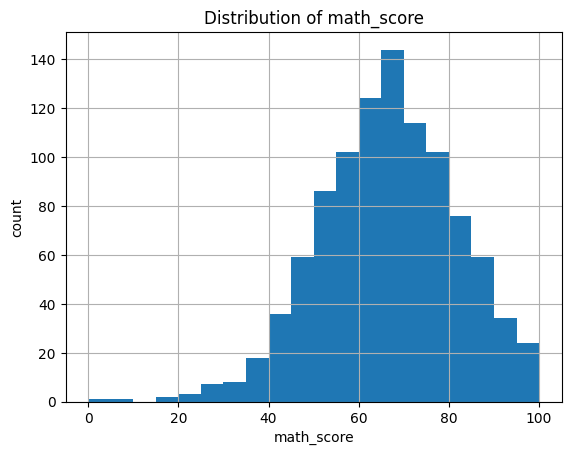

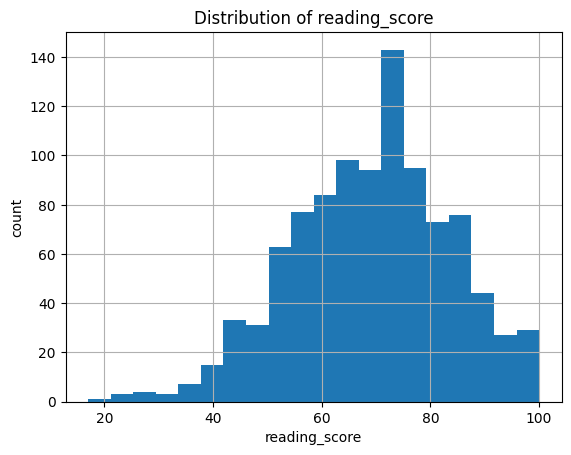

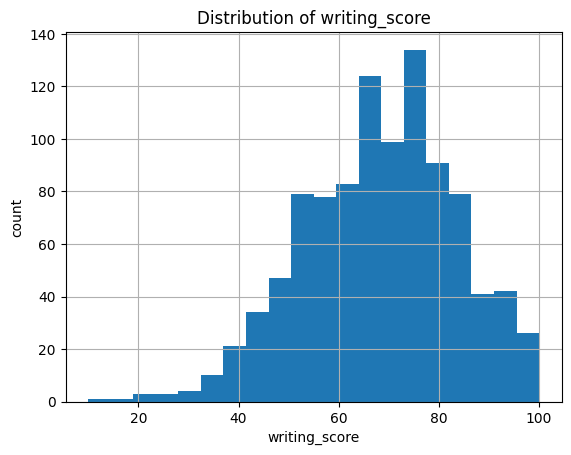

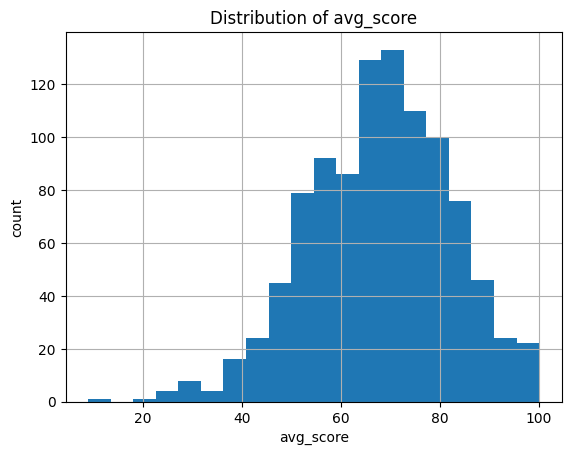

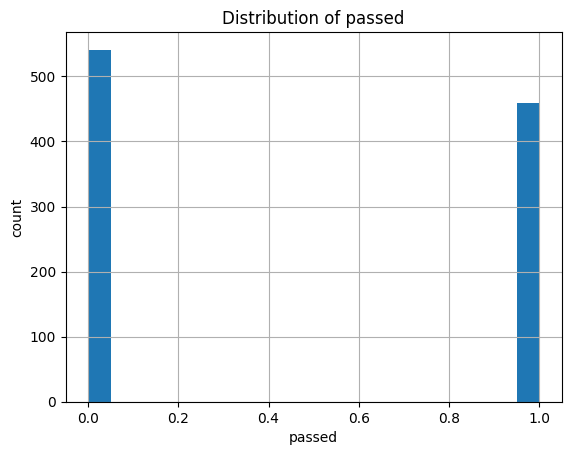

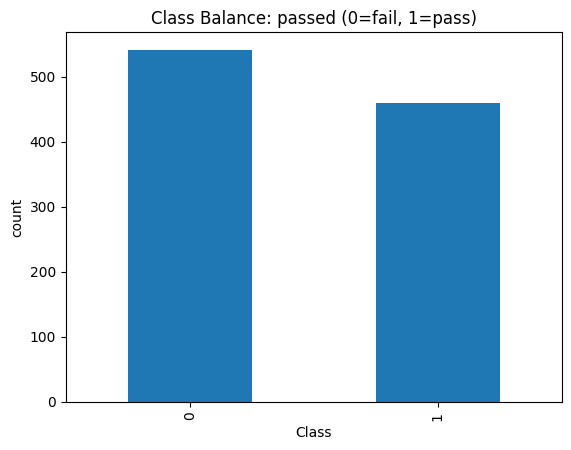

In [ ]:

# ---- Derive a classification target from the three exam scores ----
score_cols = ['math_score', 'reading_score', 'writing_score']
assert all(c in df.columns for c in score_cols), "Missing exam score columns."

# Average score & pass/fail target (threshold can be adjusted)
df['avg_score'] = df[score_cols].mean(axis=1)
df['passed'] = (df['avg_score'] >= 70).astype(int)
TARGET = 'passed'
print("TARGET =", TARGET, "| Positive class count =", int(df[TARGET].sum()))

# ---- Statistical summary ----
display(df.describe(include='all').T)

# ---- Missing values ----
missing = df.isna().sum().sort_values(ascending=False)
display(missing[missing > 0])

# ---- Distributions for numeric columns ----
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure()
    df[col].hist(bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col); plt.ylabel("count")
    plt.show()

# ---- Class balance for the derived target ----
df[TARGET].value_counts().plot(kind='bar')
plt.title("Class Balance: passed (0=fail, 1=pass)")
plt.xlabel("Class"); plt.ylabel("count")
plt.show()



## 4) Preprocessing Techniques (with justifications)
We impute missing values (median for numeric, most_frequent for categorical) and encode categoricals with One-Hot Encoding.  
To prevent leakage when TARGET is `passed` (derived from `avg_score`), we exclude `avg_score` from features.


In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Split features/target
X = df.drop(columns=[TARGET]).copy()
y = df[TARGET].copy()

# Prevent leakage (avg_score used to create passed)
if 'avg_score' in X.columns and TARGET == 'passed':
    X.drop(columns=['avg_score'], inplace=True)

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

num_pipe = Pipeline([("imp", SimpleImputer(strategy="median"))])
cat_pipe = Pipeline([("imp", SimpleImputer(strategy="most_frequent")),
                     ("ohe", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols),
], remainder="drop")

X_ready = preprocessor.fit_transform(X)

print("Processed shape:", X_ready.shape)
print("Num features:", len(num_cols), "| Cat features:", len(cat_cols))


Processed shape: (1000, 20)
Num features: 3 | Cat features: 5



## 5) Notes & Next Steps
- Key drivers: higher `avg_score` (from exam scores) aligns with `passed = 1`.
- Categorical features will be One-Hot encoded; numeric features imputed with median.
- Data is ready for Phase 2 model training (e.g., Logistic Regression, SVM, Decision Tree).
